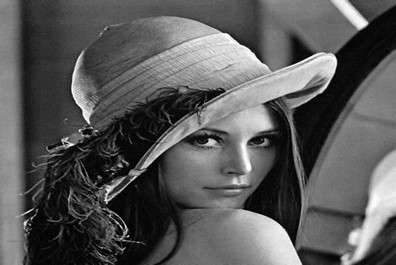

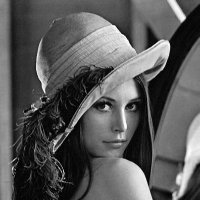

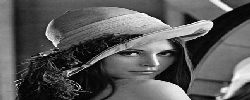

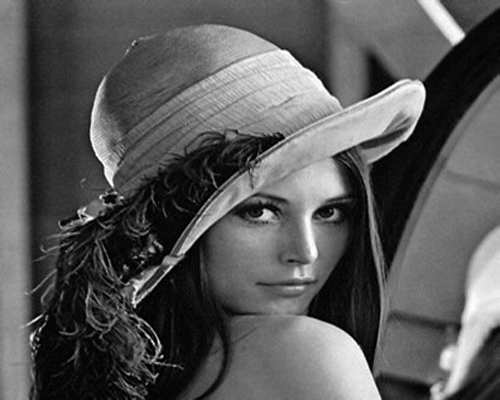

In [3]:
!pip install opencv-python-headless

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

image = cv2.imread('sample_data/Picture1.jpg')

resized_linear = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)
resized_nearest = cv2.resize(image, (250, 100), interpolation=cv2.INTER_NEAREST)
resized_polynomial = cv2.resize(image, (500, 400), interpolation=cv2.INTER_CUBIC)

cv2_imshow(image)
cv2_imshow(resized_linear)
cv2_imshow(resized_nearest)
cv2_imshow(resized_polynomial)

cv2.waitKey(0)
cv2.destroyAllWindows()

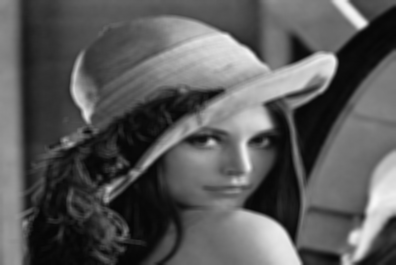

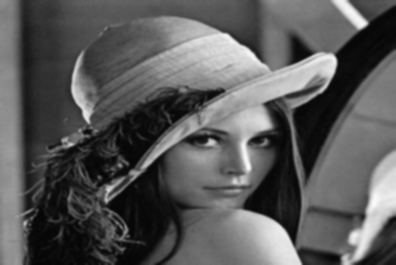

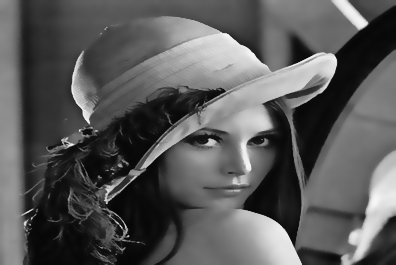

In [4]:
box_blur = cv2.blur(image, (5, 5))
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)

cv2_imshow(box_blur)
cv2_imshow(gaussian_blur)
cv2_imshow(adaptive_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

results = {}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    cv_scores = cross_val_score(model, X, y, cv=cv)

    y_pred_proba = model.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')


    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Mean Accuracy': cv_scores.mean(),
        'AUC': auc,
    }

    print(f"{name} Results: {results[name]}")



Training SVM...
SVM Results: {'Accuracy': 0.9861111111111112, 'Precision': 0.9861882716049383, 'Recall': 0.9861111111111112, 'F1-Score': 0.9861071324368055, 'CV Mean Accuracy': 0.9877561126586197, 'AUC': 0.9999128891430722}
Training Random Forest...
Random Forest Results: {'Accuracy': 0.9722222222222222, 'Precision': 0.9725507204287926, 'Recall': 0.9722222222222222, 'F1-Score': 0.9722290797927471, 'CV Mean Accuracy': 0.9782930981120396, 'AUC': 0.9995322668311306}


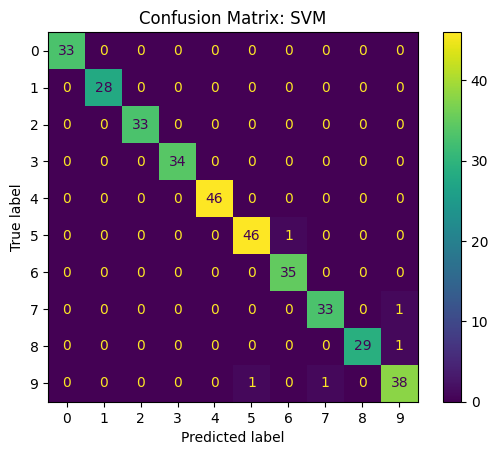

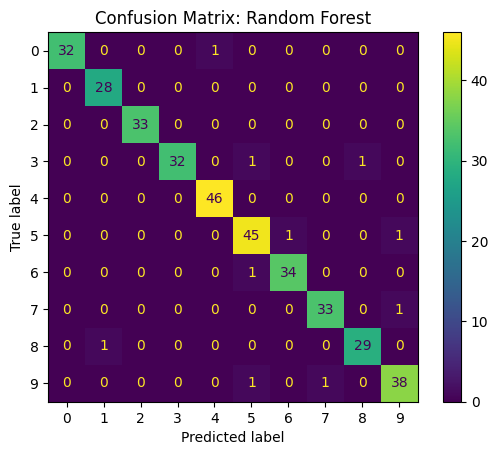

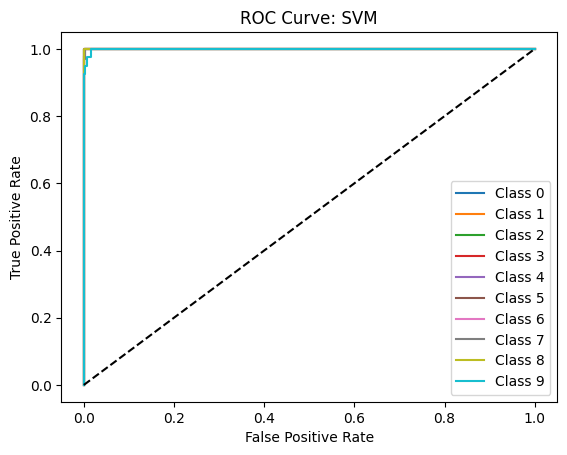

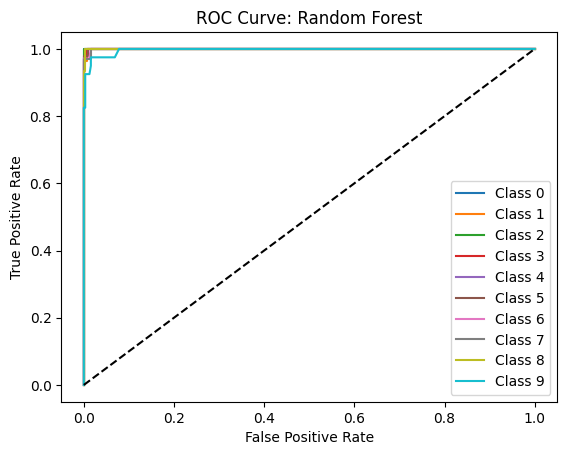

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

for name, model in models.items():
    y_proba = model.predict_proba(X_test)
    fpr = {}
    tpr = {}

    for i in range(10):  # MNIST digits (0-9)
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_proba[:, i])
        plt.plot(fpr[i], tpr[i], label=f"Class {i}")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {name}")
    plt.legend()
    plt.show()
